In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords, treebank
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from textblob import TextBlob
from collections import Counter

import spacy
from spacy.language import Language
from spacy import displacy

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='nltk')

In [2]:
# pip install wordcloud
# pip install spacy
# python -m spacy download en
# pip install textblob
# nltk.download('all')

**- Exercici 1**
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.


**- Exercici 2**
Treu les stopwords i realitza stemming al teu conjunt de dades.


**- Exercici 3**
Realitza sentiment analysis al teu conjunt de dades.

### Exercici 1: ###
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

- He elegido el capítulo 1 del libro, Frankenstein, puesto que parece ser el que tiene más descargas en la web mencionada (https://www.gutenberg.org/cache/epub/84/pg84-images.html)

Seguiré este proceso recomendado: 

1.- importar bibliotecas y cargar el conjunto de datos

2.- Preprocesamiento de texto
- Tokenización (word_tokenize)
- Stop words: eliminación de palabras irrelevantes  (vacías, sin significado)
- Stemming and Lemmatization (Derivación y lematización): reducir palabras a raíz, elimnando sufijos,...

3.- Calcularé frecuencia de las palabras y mostraré gráfica.

4.- Realizaré el sentimiento de análisis.

In [2]:
text= """I am by birth a Genevese, and my family is one of the most distinguished of that republic. My ancestors had been for many years counsellors and syndics, and my father had filled several public situations with honour and reputation. He was respected by all who knew him for his integrity and indefatigable attention to public business. He passed his younger days perpetually occupied by the affairs of his country; a variety of circumstances had prevented his marrying early, nor was it until the decline of life that he became a husband and the father of a family.

As the circumstances of his marriage illustrate his character, I cannot refrain from relating them. One of his most intimate friends was a merchant who, from a flourishing state, fell, through numerous mischances, into poverty. This man, whose name was Beaufort, was of a proud and unbending disposition and could not bear to live in poverty and oblivion in the same country where he had formerly been distinguished for his rank and magnificence. Having paid his debts, therefore, in the most honourable manner, he retreated with his daughter to the town of Lucerne, where he lived unknown and in wretchedness. My father loved Beaufort with the truest friendship and was deeply grieved by his retreat in these unfortunate circumstances. He bitterly deplored the false pride which led his friend to a conduct so little worthy of the affection that united them. He lost no time in endeavouring to seek him out, with the hope of persuading him to begin the world again through his credit and assistance.

Beaufort had taken effectual measures to conceal himself, and it was ten months before my father discovered his abode. Overjoyed at this discovery, he hastened to the house, which was situated in a mean street near the Reuss. But when he entered, misery and despair alone welcomed him. Beaufort had saved but a very small sum of money from the wreck of his fortunes, but it was sufficient to provide him with sustenance for some months, and in the meantime he hoped to procure some respectable employment in a merchant’s house. The interval was, consequently, spent in inaction; his grief only became more deep and rankling when he had leisure for reflection, and at length it took so fast hold of his mind that at the end of three months he lay on a bed of sickness, incapable of any exertion.

His daughter attended him with the greatest tenderness, but she saw with despair that their little fund was rapidly decreasing and that there was no other prospect of support. But Caroline Beaufort possessed a mind of an uncommon mould, and her courage rose to support her in her adversity. She procured plain work; she plaited straw and by various means contrived to earn a pittance scarcely sufficient to support life.

Several months passed in this manner. Her father grew worse; her time was more entirely occupied in attending him; her means of subsistence decreased; and in the tenth month her father died in her arms, leaving her an orphan and a beggar. This last blow overcame her, and she knelt by Beaufort’s coffin weeping bitterly, when my father entered the chamber. He came like a protecting spirit to the poor girl, who committed herself to his care; and after the interment of his friend he conducted her to Geneva and placed her under the protection of a relation. Two years after this event Caroline became his wife.

There was a considerable difference between the ages of my parents, but this circumstance seemed to unite them only closer in bonds of devoted affection. There was a sense of justice in my father’s upright mind which rendered it necessary that he should approve highly to love strongly. Perhaps during former years he had suffered from the late-discovered unworthiness of one beloved and so was disposed to set a greater value on tried worth. There was a show of gratitude and worship in his attachment to my mother, differing wholly from the doting fondness of age, for it was inspired by reverence for her virtues and a desire to be the means of, in some degree, recompensing her for the sorrows she had endured, but which gave inexpressible grace to his behaviour to her. Everything was made to yield to her wishes and her convenience. He strove to shelter her, as a fair exotic is sheltered by the gardener, from every rougher wind and to surround her with all that could tend to excite pleasurable emotion in her soft and benevolent mind. Her health, and even the tranquillity of her hitherto constant spirit, had been shaken by what she had gone through. During the two years that had elapsed previous to their marriage my father had gradually relinquished all his public functions; and immediately after their union they sought the pleasant climate of Italy, and the change of scene and interest attendant on a tour through that land of wonders, as a restorative for her weakened frame.

From Italy they visited Germany and France. I, their eldest child, was born at Naples, and as an infant accompanied them in their rambles. I remained for several years their only child. Much as they were attached to each other, they seemed to draw inexhaustible stores of affection from a very mine of love to bestow them upon me. My mother’s tender caresses and my father’s smile of benevolent pleasure while regarding me are my first recollections. I was their plaything and their idol, and something better—their child, the innocent and helpless creature bestowed on them by Heaven, whom to bring up to good, and whose future lot it was in their hands to direct to happiness or misery, according as they fulfilled their duties towards me. With this deep consciousness of what they owed towards the being to which they had given life, added to the active spirit of tenderness that animated both, it may be imagined that while during every hour of my infant life I received a lesson of patience, of charity, and of self-control, I was so guided by a silken cord that all seemed but one train of enjoyment to me.

For a long time I was their only care. My mother had much desired to have a daughter, but I continued their single offspring. When I was about five years old, while making an excursion beyond the frontiers of Italy, they passed a week on the shores of the Lake of Como. Their benevolent disposition often made them enter the cottages of the poor. This, to my mother, was more than a duty; it was a necessity, a passion—remembering what she had suffered, and how she had been relieved—for her to act in her turn the guardian angel to the afflicted. During one of their walks a poor cot in the foldings of a vale attracted their notice as being singularly disconsolate, while the number of half-clothed children gathered about it spoke of penury in its worst shape. One day, when my father had gone by himself to Milan, my mother, accompanied by me, visited this abode. She found a peasant and his wife, hard working, bent down by care and labour, distributing a scanty meal to five hungry babes. Among these there was one which attracted my mother far above all the rest. She appeared of a different stock. The four others were dark-eyed, hardy little vagrants; this child was thin and very fair. Her hair was the brightest living gold, and despite the poverty of her clothing, seemed to set a crown of distinction on her head. Her brow was clear and ample, her blue eyes cloudless, and her lips and the moulding of her face so expressive of sensibility and sweetness that none could behold her without looking on her as of a distinct species, a being heaven-sent, and bearing a celestial stamp in all her features.

The peasant woman, perceiving that my mother fixed eyes of wonder and admiration on this lovely girl, eagerly communicated her history. She was not her child, but the daughter of a Milanese nobleman. Her mother was a German and had died on giving her birth. The infant had been placed with these good people to nurse: they were better off then. They had not been long married, and their eldest child was but just born. The father of their charge was one of those Italians nursed in the memory of the antique glory of Italy—one among the schiavi ognor frementi, who exerted himself to obtain the liberty of his country. He became the victim of its weakness. Whether he had died or still lingered in the dungeons of Austria was not known. His property was confiscated; his child became an orphan and a beggar. She continued with her foster parents and bloomed in their rude abode, fairer than a garden rose among dark-leaved brambles.

When my father returned from Milan, he found playing with me in the hall of our villa a child fairer than pictured cherub—a creature who seemed to shed radiance from her looks and whose form and motions were lighter than the chamois of the hills. The apparition was soon explained. With his permission my mother prevailed on her rustic guardians to yield their charge to her. They were fond of the sweet orphan. Her presence had seemed a blessing to them, but it would be unfair to her to keep her in poverty and want when Providence afforded her such powerful protection. They consulted their village priest, and the result was that Elizabeth Lavenza became the inmate of my parents’ house—my more than sister—the beautiful and adored companion of all my occupations and my pleasures.

Everyone loved Elizabeth. The passionate and almost reverential attachment with which all regarded her became, while I shared it, my pride and my delight. On the evening previous to her being brought to my home, my mother had said playfully, “I have a pretty present for my Victor—tomorrow he shall have it.” And when, on the morrow, she presented Elizabeth to me as her promised gift, I, with childish seriousness, interpreted her words literally and looked upon Elizabeth as mine—mine to protect, love, and cherish. All praises bestowed on her I received as made to a possession of my own. We called each other familiarly by the name of cousin. No word, no expression could body forth the kind of relation in which she stood to me—my more than sister, since till death she was to be mine only."""

In [3]:
print (text)

I am by birth a Genevese, and my family is one of the most distinguished of that republic. My ancestors had been for many years counsellors and syndics, and my father had filled several public situations with honour and reputation. He was respected by all who knew him for his integrity and indefatigable attention to public business. He passed his younger days perpetually occupied by the affairs of his country; a variety of circumstances had prevented his marrying early, nor was it until the decline of life that he became a husband and the father of a family.

As the circumstances of his marriage illustrate his character, I cannot refrain from relating them. One of his most intimate friends was a merchant who, from a flourishing state, fell, through numerous mischances, into poverty. This man, whose name was Beaufort, was of a proud and unbending disposition and could not bear to live in poverty and oblivion in the same country where he had formerly been distinguished for his rank and m

**Paso 2: preprocesar el texto**:

Elimino las mayúsculas, 

In [4]:
lower_text = text.lower()
print (lower_text)
print(f'\n Nº de palabras: {len(lower_text)}')

i am by birth a genevese, and my family is one of the most distinguished of that republic. my ancestors had been for many years counsellors and syndics, and my father had filled several public situations with honour and reputation. he was respected by all who knew him for his integrity and indefatigable attention to public business. he passed his younger days perpetually occupied by the affairs of his country; a variety of circumstances had prevented his marrying early, nor was it until the decline of life that he became a husband and the father of a family.

as the circumstances of his marriage illustrate his character, i cannot refrain from relating them. one of his most intimate friends was a merchant who, from a flourishing state, fell, through numerous mischances, into poverty. this man, whose name was beaufort, was of a proud and unbending disposition and could not bear to live in poverty and oblivion in the same country where he had formerly been distinguished for his rank and m

***REALIZO LA TOKETIZACIÓN PARA DIVIDIR EL TEXTO EN PALABRAS INDIVIDUALES:***

In [5]:
# Tokenitzación
token = nltk.word_tokenize(lower_text)

print(token[:20])
print(f'\n Nº de palabras tokenizadas: {len(token)}')

['i', 'am', 'by', 'birth', 'a', 'genevese', ',', 'and', 'my', 'family', 'is', 'one', 'of', 'the', 'most', 'distinguished', 'of', 'that', 'republic', '.']

 Nº de palabras tokenizadas: 1965


***PROCEDO A REALIZAR PARTE DEL EJERCICIO 2 PARA TRABAJAR CON LAS PALABRAS YA LIMPIAS:***

Elimino las palabras que contienen caracteres no alfabéticos:

In [6]:
tokens_cleaned = [word for word in token if word.isalpha()] 
tokens_cleaned

print(f'\n Nº de palabras tokenizadas y limpias: {len(tokens_cleaned)}')


 Nº de palabras tokenizadas y limpias: 1753


***ELIMINO LAS STOP WORDS:*** 

Eliminamos las palabras que tienen bajo valor semántico, para que destaquen las más relevantes.

In [16]:
stop_words = set(stopwords.words('english'))
tokens_without_stopwords = [word for word in tokens_cleaned if word.lower() not in stop_words]
print(f'\n Nº de palabras sin stopwords: {len(tokens_without_stopwords)}')
palabras_unicas_sin_stopwords = set(tokens_without_stopwords)
print(f'\n Nº de palabras únicas sin stopwords: {len(palabras_unicas_sin_stopwords)}')



 Nº de palabras sin stopwords: 802

 Nº de palabras únicas sin stopwords: 618


- Observamos que cuando se eliminan las stop words, se calculan todas aunque sean repetidas. Para ello , pasamos a calcular las únicas y así no se suman las repetidas. 
- Había casi 200 palabras repetidas.

HAGO ALGÚN ESTUDIO OPCIONAL, COMO ETIQUETADOS Y ÁRBOL DE ANÁLISIS (que en este caso solo mostraré muy sencillamente)

**Etiquetado de palabras:**

In [8]:
tagged = nltk.pos_tag(tokens_without_stopwords)
>>> tagged[0:20]

[('birth', 'NN'),
 ('genevese', 'JJ'),
 ('family', 'NN'),
 ('one', 'CD'),
 ('distinguished', 'VBN'),
 ('republic', 'JJ'),
 ('ancestors', 'NNS'),
 ('many', 'JJ'),
 ('years', 'NNS'),
 ('counsellors', 'NNS'),
 ('syndics', 'VBP'),
 ('father', 'RB'),
 ('filled', 'VBN'),
 ('several', 'JJ'),
 ('public', 'JJ'),
 ('situations', 'NNS'),
 ('honour', 'VBP'),
 ('reputation', 'NN'),
 ('respected', 'VBD'),
 ('knew', 'JJ')]

Algunos ejemplos: 

- ('birth', 'NN'): "birth" es un sustantivo (NN, sustantivo singular).
- ('genevese', 'JJ'): "genevese" es un adjetivo (JJ, adjetivo).
- ('one', 'CD'): "one" es un número cardinal (CD, cardinal number).
- ('distinguished', 'VBN'): "distinguished" es un verbo en participio pasado (VBN).
- ('republic', 'JJ'): "republic" es un adjetivo.
- ('ancestor', 'NN'): "ancestor" es un sustantivo.
- ('syndic', 'VBP'): "syndic" es un verbo en presente (VBP).
- ('father', 'RB'): "father" está etiquetado como adverbio, pero quizás es un error, puesto que sería sustantivo : "father"

Estas etiquetas nos dán información y nos podrían ser útiles para otros análisis.

**Mostrar un árbol de análisis**

In [13]:
from IPython.display import Image, display
t = treebank.parsed_sents('wsj_0001.mrg')[0]
print (t)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


- En este caso no nos sirve de mucho pero entiendo que en otros tipos de texto, puede ser de gran ayuda ver la jerarquía de las palabras.

***CALCULO LA FRECUENCIA DE PALABRAS SOLICITADA EN EL EJERCICIO 1:***

In [43]:
freq_dist = FreqDist(tokens_without_stopwords)

df_palabra_frec = pd.DataFrame([(word, freq) for word, freq in freq_dist.items()], columns=['Palabra', 'Frecuencia'])
top20= df_palabra_frec.sort_values(by='Frecuencia', ascending=False)
top20.head(20).T

,11,263,3,334,38,8,57,234,61,113,37,157,568,74,53,187,24,282,32,173
Palabra,father,mother,one,child,became,years,beaufort,seemed,could,months,life,mind,elizabeth,daughter,poverty,means,passed,made,circumstances,support
Frecuencia,13,10,8,8,7,6,6,6,4,4,4,4,4,4,4,3,3,3,3,3


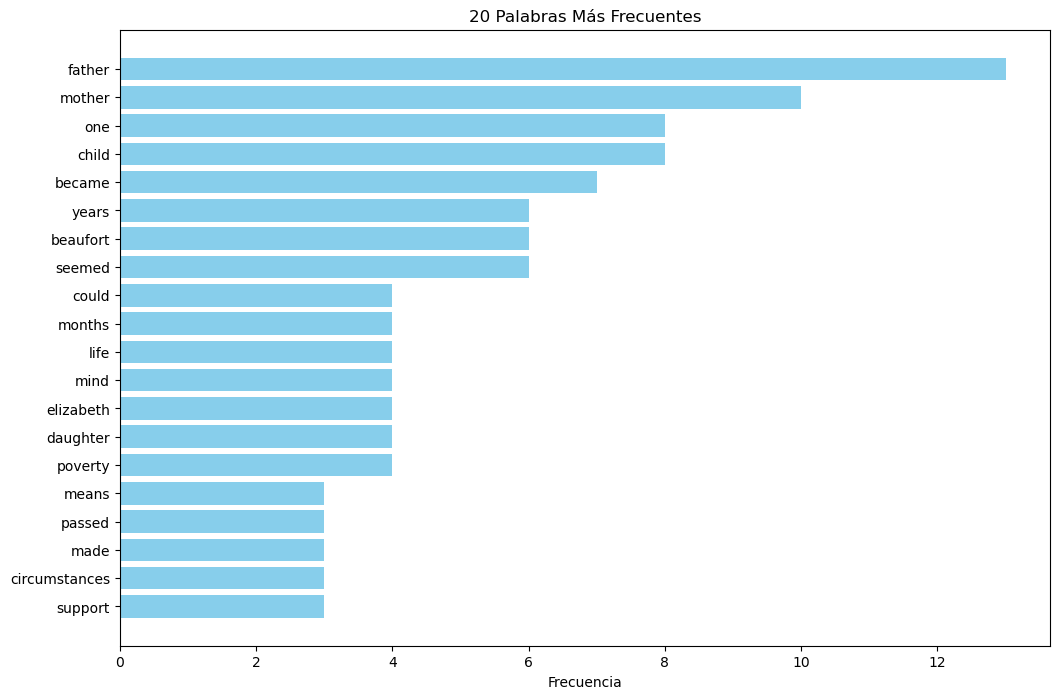

In [50]:
import matplotlib.pyplot as plt

# Obtén las 20 palabras más frecuentes
top20 = df_palabra_frec.sort_values(by='Frecuencia', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top20['Palabra'], top20['Frecuencia'], color='skyblue')
plt.xlabel('Frecuencia')
plt.title('20 Palabras Más Frecuentes')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra más frecuente esté en la parte superior

plt.show()

- Observamos que las palabras Padre y Madre, precedidas de one child, son las más frecuentes. Y tiene lógica en el capítulo 1 de cualquier libro de la vida de un personaje como "Frankenstein" porque es en el que se suelen presentar los personajes. 

***REALIZAMOS UNA NUVE DE PALABRAS PARA VISUALIZAR LAS PALABRAS MÁS RELEVANTES (CON MÁS FRECUENCIA):***

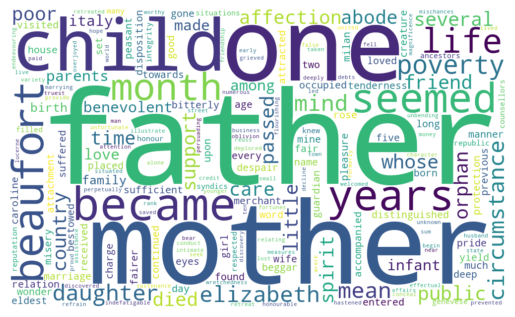

In [55]:
tmp=' '.join(tokens_without_stopwords)
wordcloud = WordCloud(width=1000, height=600, background_color='white')
wordcloud.generate(tmp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

***REALIZO EL STEAMMING DE MI CONJUNTO DE DATOS:***

Para asegurar que se va a la raíz de cada palabra.

In [62]:
stemmed_words=[PorterStemmer().stem(element) for element in tokens_without_stopwords]
nltk.FreqDist(stemmed_words)

FreqDist({'father': 13, 'mother': 10, 'one': 8, 'child': 8, 'becam': 7, 'year': 6, 'beaufort': 6, 'love': 6, 'seem': 6, 'month': 5, ...})

En el resultado, apreciamos ***LOVE*** , como la palabra que ha subido de ranking. Entiendo que ha buscado la raíz de varios verbos , adverbios o palabras que contenian "love".

- Voy a realizar la comprobación: 

In [64]:
# Lista de palabras que contienen el string "love"
love_words = [word for word in tokens_cleaned if 'love' in word]
love_words

['loved', 'love', 'beloved', 'love', 'lovely', 'loved', 'love']

- Observamos que de las 6 contabilizada, solo 3 son love, las otras son derivadas o conjugadas.

QUIERO VER UN PAR DE FUNCIONES POSIBLES PARA EL TEXT MINNING: 

POR EJEMPLO LA FUNCIÓN DE **CONCORDANCIA**, EN QUÉ CONTEXTOS APARECEN ALGUNAS DE LAS PALABRAS MÁS REPETIDAS:

In [106]:
father = nltk.Text(tokens_without_stopwords)
father.concordance("father", lines=3)

Displaying 3 of 13 matches:
tors many years counsellors syndics father filled several public situations ho
g early decline life became husband father family circumstances marriage illus
 lucerne lived unknown wretchedness father loved beaufort truest friendship de


In [107]:
love = nltk.Text(tokens_without_stopwords)
love.concordance("child", lines=3)

Displaying 3 of 8 matches:
 italy visited germany france eldest child born naples infant accompanied rambl
anied rambles remained several years child much attached seemed draw inexhausti
collections plaything idol something child innocent helpless creature bestowed 


OTRA OPCIÓN ES ANALIZAR LA **COLOCACIÓN** QUE NOS DARÁ INFORMACIÓN SOBRE SECUENCIAS DE PALABRAS QUE SUELEN APARECER JUNTAS:

In [110]:
colocacion = nltk.collocations.TrigramCollocationFinder.from_words(tokens_without_stopwords)
colocacion.ngram_fd.most_common(3)
colocacion.ngram_fd.tabulate(3)

    ('eldest', 'child', 'born') ('birth', 'genevese', 'family')   ('genevese', 'family', 'one') 
                              2                               1                               1 


- Observamos que nacimiento, niño, pueden ser habituales en el capítulo 1 de Frankenstein, al igual de la familia y lugar donde nació.

**EXERCICI 3: Analizador de sentimiento**

In [95]:
sentimiento_texto = ' '.join(stemmed_words)
sentimiento_analyzer = SentimentIntensityAnalyzer()
scores = sentimiento_analyzer.polarity_scores(sentimiento_texto)
df_scores = pd.DataFrame(scores, index=[0])
print(df_scores)


     neg    neu    pos  compound
0  0.085  0.693  0.222     0.999


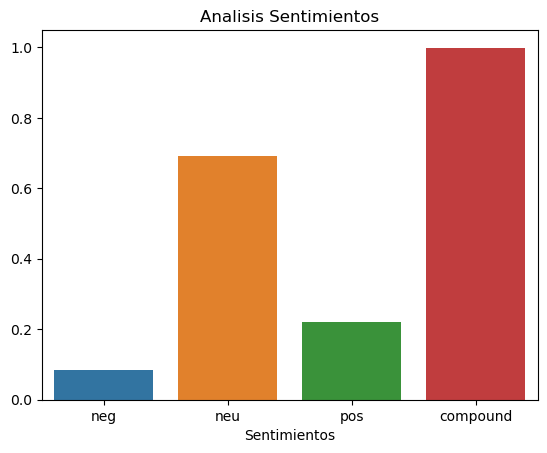

In [96]:
sns.barplot(df_scores)
plt.xlabel ('Sentimientos')
plt.title ('Analisis Sentimientos')
plt.show()

Observamos que después de haber efectuado un análisis de sentimiento con SentimentIntensityAnalyzer:

- El valor 'neg' representa la proporción de negatividad en el texto, que es de 8.5%
- El valor 'neu' representa la proporción de neutralidad en el texto, que resulta ser 69%
- El valor 'pos' representa la proporción de positividad en el texto 22%
- El valor 'compound' representa el puntaje compuesto del sentimiento del texto en su conjunto 100% 

Con estos valores, observamos que el texto es básicamente neutro. Los sentimientos positivos, triplican los negativos. Y es por este motivo que a nivel general de sentimiento es positivo.